# Определение типа потенциально популярной игры

# Описание проекта

Требуется проанализировать исторические данные о прадажах игр для выявления потенциально популярного продукта.

<h2>Описание данных<span class="tocSkip"></span></h2>

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных

Импортируем нужные библиотеки

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Посмотрим на данные.

In [69]:
df = pd.read_csv('/datasets/games.csv')

In [70]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим процент пропусков.

In [72]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

**Вывод**

В предоставленной таблице имеются пропуски (в некоторых столбцах около половины значений). Имеются столбцы с неверным типом данных, а также названия имеют буквы верхнего регистра. Требуется проверка на аномальные значения.

## Предобработка данных

Заменю названия столбцов. Приведу их к нижнему регистру.

In [73]:
df.columns = df.columns.str.lower()

In [74]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проанализируем пропуски в name.

In [75]:
df[(df['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких всего 2, причем эти строки имеют пропуски в жанре, оценках и рейтинге. Строк мало, удалю их.

In [76]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [77]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропусков в year_of_release всего 269. Проанализируем их.

In [78]:
df[df['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


Данные игры в основном своем колличестве были проданны в малом объеме. В связи с этим, можно предположить, что данные по ним собирались не полностью. Поэтому нет информации о дате выхода.

Заполню пропуски -1 и переведу в тип данных int.

In [79]:
df['year_of_release'] = df['year_of_release'].fillna(-1)

In [80]:
df['year_of_release'] = df['year_of_release'].astype('int')

Возможно пропуски в столбцах critic_score, user_score и rating взаимосвязаны. Посмотрю сколько строк, которые имеют пропуски во всех вышеперечисленных столбцах.

In [81]:
len(df[df['critic_score'].isna() & df['user_score'].isna() & df['rating'].isna()])

6619

In [82]:
df[df['critic_score'].isna() & df['user_score'].isna() & df['rating'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,0.0
mean,1978.991388,0.186296,0.091163,0.126779,0.022515,NaN
std,225.970356,0.804296,0.351067,0.386667,0.093044,NaN
min,-1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2006.000000,0.000000,0.000000,0.020000,0.000000,NaN
75%,2010.000000,0.120000,0.050000,0.100000,0.010000,NaN
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN


Можно сделать вывод, что игры с пропусками в данных столбцах малоизвестны и их не оценили.

Оставлю в них NaN.

В user_score имеется тип object для удобства требуется перевести в float, но в нем есть значения tbd.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено).
Переведу TBD в NaN и заодно переведу столбец во float.

In [83]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Посмотрю уникальные значения рейтинга.

In [84]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

K-A означает Kids to Adults и входит в тип «E» («Everyone») — «Для всех». Поменяю все K-A на E.

In [85]:
df['rating'] = df['rating'].replace('K-A', 'E')

Посчитаю суммарные продажи во всех регионах.

In [86]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Вывод**

В предоставленных данных основные пропуски были связаны со строками, в которых была информация о малоизместных играх. Было принято решения так и оставить в них NaN.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные периоды.

Text(0, 0.5, 'Капитализация')

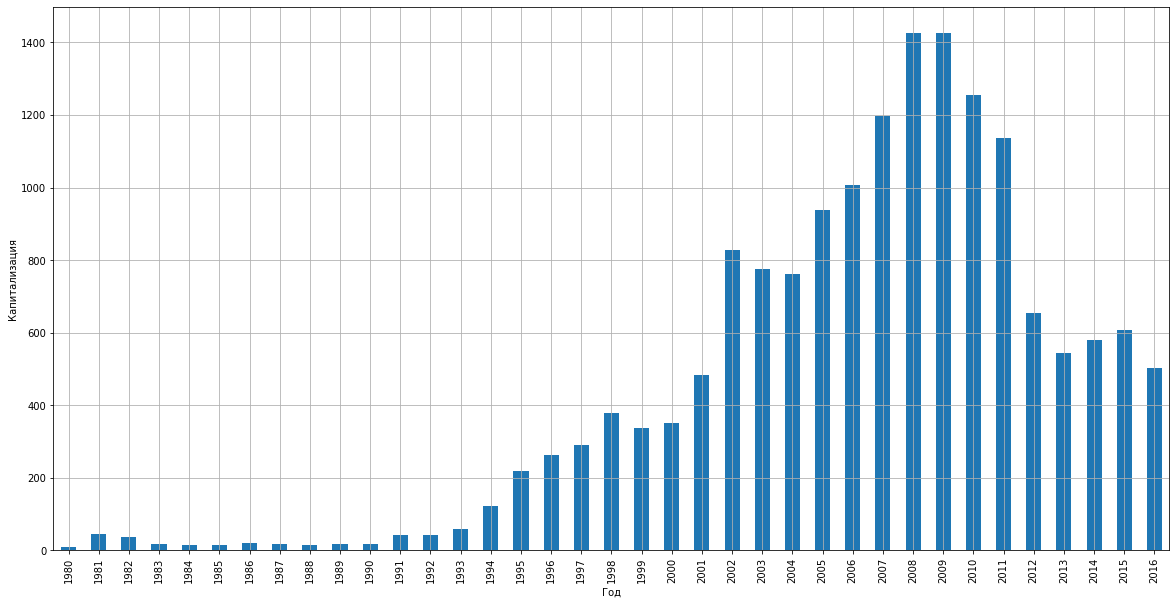

In [87]:
df[df['year_of_release']!=-1].groupby('year_of_release')['name'].count().plot(kind='bar', figsize=[20,10], grid=True)
plt.xlabel("Год")
plt.ylabel("Капитализация")

С 1980 сфера игр развивалась. В 2008-2009 был пик в данной индустрии. Для анализа будет полезен период с 2002 и позже. На это время, судя по капитализации игр, приходится основное развитие.

Выявим самые популярные платформы с точки зрения продаж игр.

Text(0, 0.5, 'Капитализация')

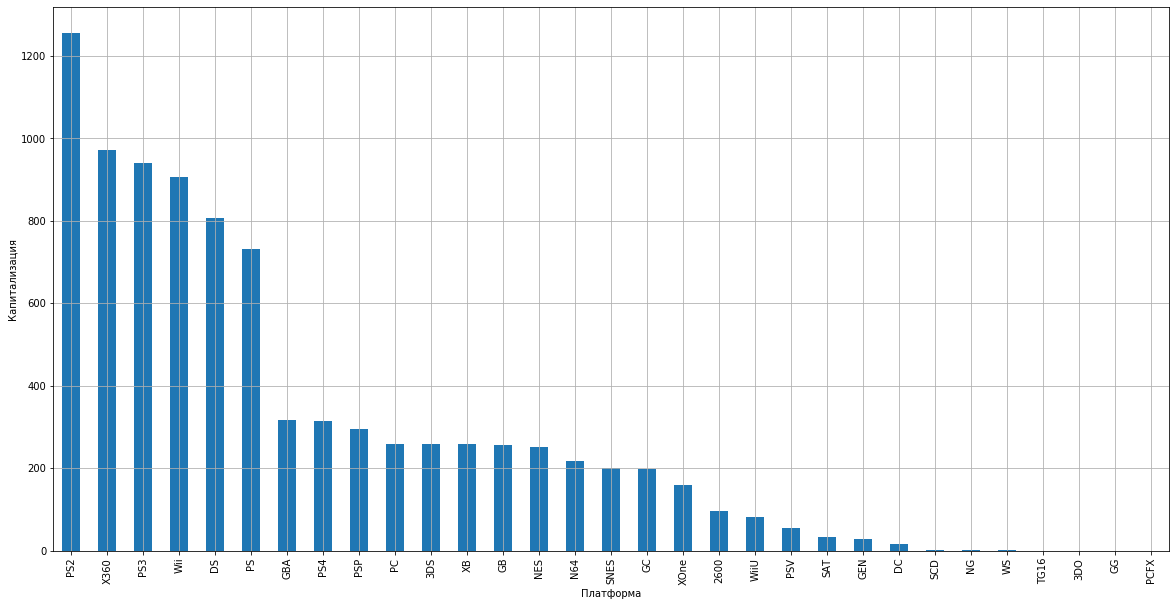

In [88]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=[20,10], grid=True)
plt.xlabel("Платформа")
plt.ylabel("Капитализация")

Самыми продаваемыми оказались: PS, DS, Wii, PS3, X360, PS2. Построю по каждой из них распределение продаж по годам.

Text(0, 0.5, 'Капитализация')

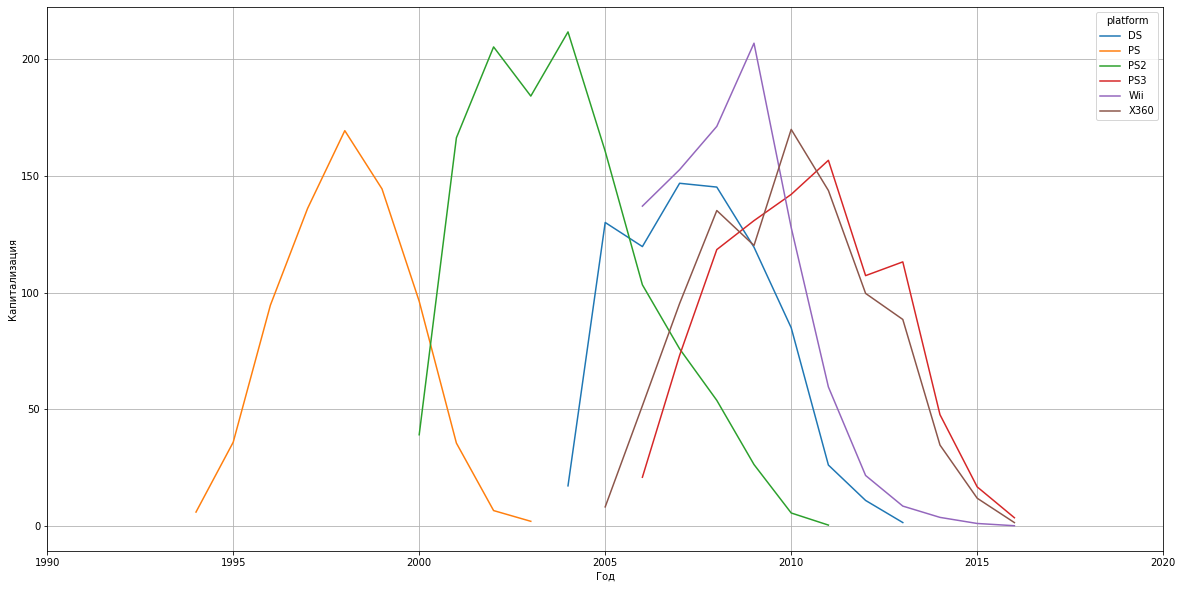

In [89]:
df[(df['platform'].isin(df.groupby('platform')['all_sales'].sum()
                        .sort_values(ascending=False).head(6).reset_index()['platform'].to_list()))
   & (df['year_of_release'] != -1)].pivot_table(index='year_of_release',
                                                columns='platform',
                                                values='all_sales',
                                                aggfunc='sum').reset_index().plot(x='year_of_release',
                                                                                  xlim=(1990, 2020),
                                                                                  figsize=[20,10],
                                                                                  grid=True)
plt.xlabel("Год")
plt.ylabel("Капитализация")

Подсчитаем средний срок жизни всех платформ.

In [90]:
data = df[(df['year_of_release'] != -1)].pivot_table(index='platform',
                                                values='year_of_release',
                                                aggfunc=['nunique', 'max']).reset_index()


In [91]:
print('Средний срок жизни =', data[( 'nunique', 'year_of_release')].mean())

Средний срок жизни = 7.67741935483871


Анализ будет проводится с 2013 г. Выделю платформы, которые были произведены в 2013 и позже.

In [ ]:
df_act = df[df['year_of_release'] >= 2013]

Пострим график распределения продаж по годам в разрезе платформ.

Text(0, 0.5, 'Капитализация')

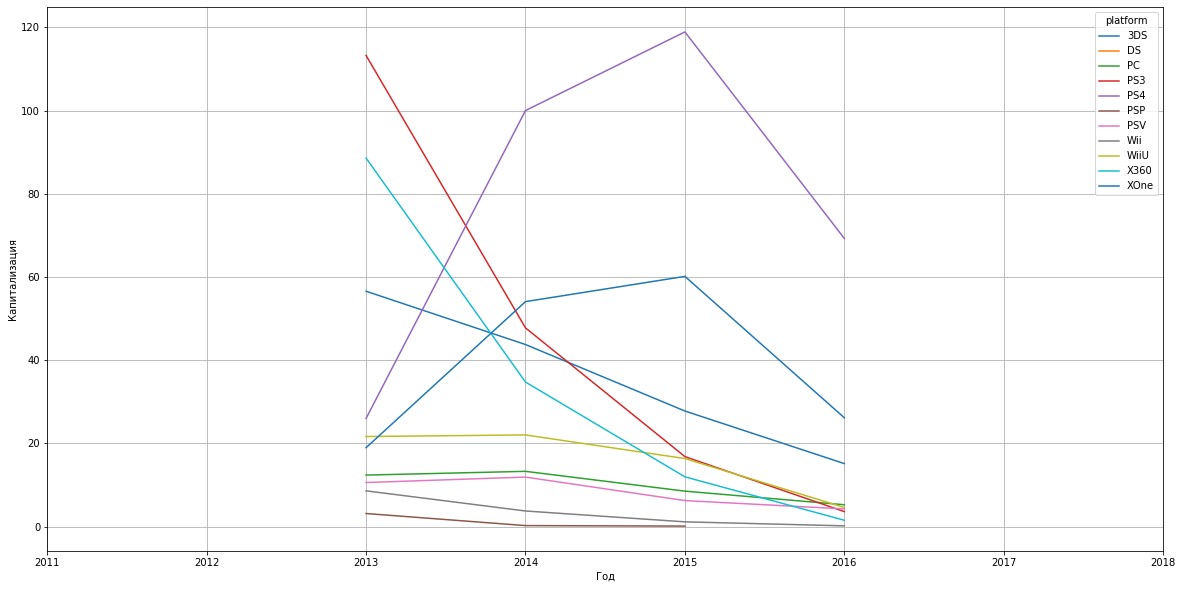

In [93]:
df_act[df_act['year_of_release'] != -1].pivot_table(index='year_of_release',
                   columns='platform',
                   values='all_sales',
                   aggfunc='sum').reset_index().plot(x='year_of_release',
                                                     xlim=(2011, 2018),
                                                     figsize=[20,10],
                                                     grid=True)
plt.xlabel("Год")
plt.ylabel("Капитализация")

In [94]:
df_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


По графику можно увидеть, что за данный период самыми продаваемыми были: Wii, X360, PS3. В целом продажи по всем платформам падают, но есть и потенциально прибыльные: PS4, XOne и 3DS.

Выведем boxplot для разных платформ.

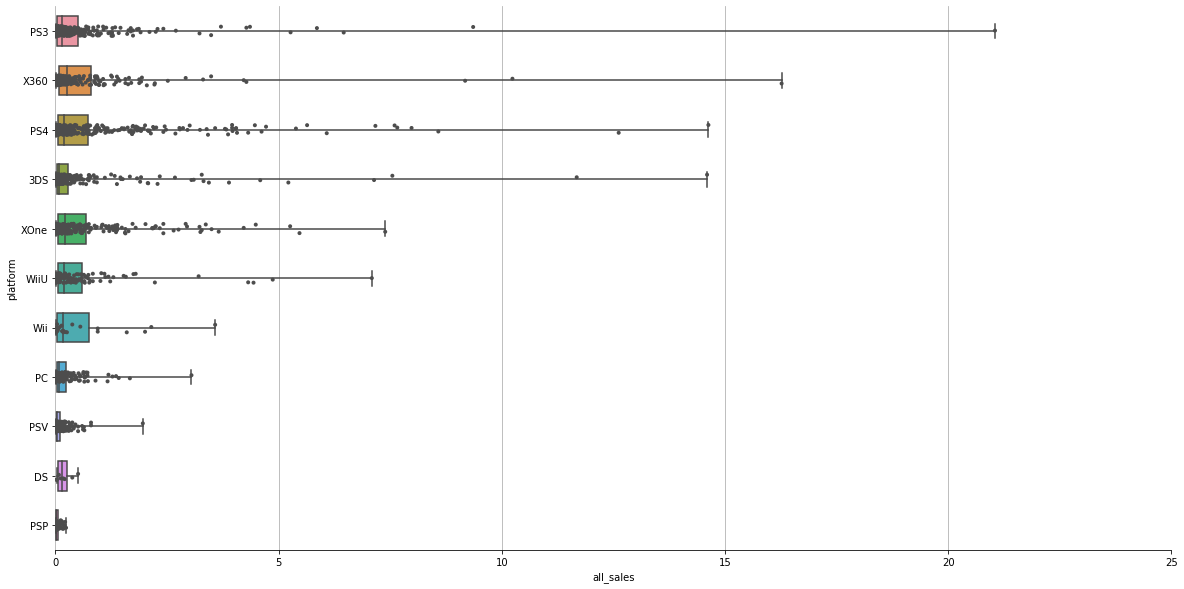

In [109]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="all_sales", y="platform", data=df_act, whis=[0, 100], width=.6)
sns.stripplot(x="all_sales", y="platform", data=df_act,
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(xlim=(0, 25))
sns.despine(trim=True, left=True)

Изменим маштаб графиков

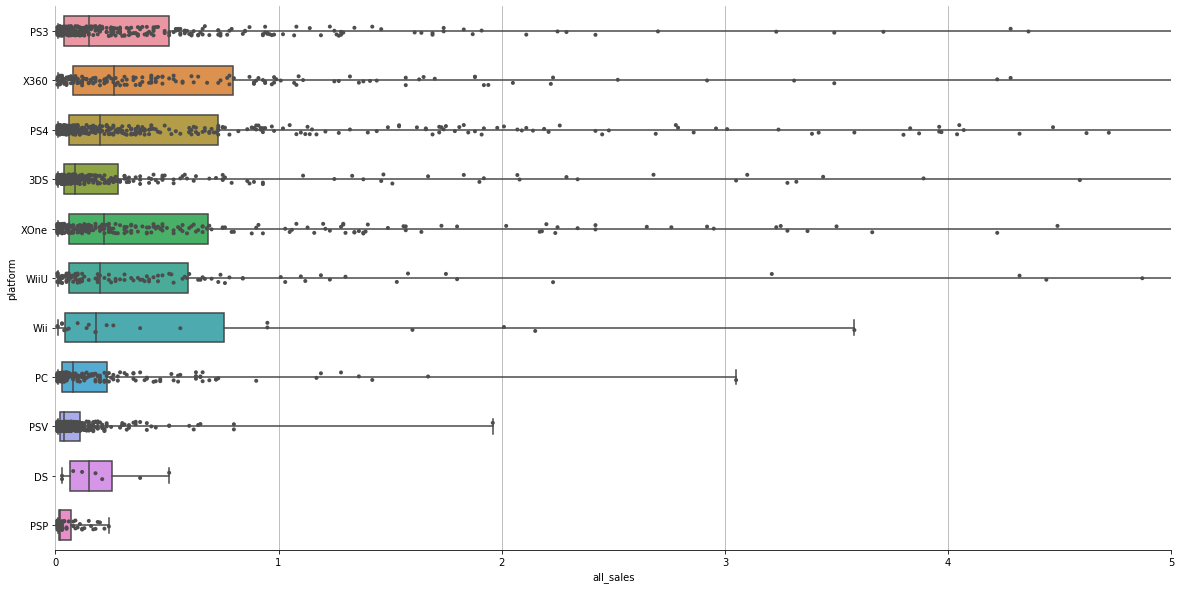

In [96]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="all_sales", y="platform", data=df_act, whis=[0, 100], width=.6)
sns.stripplot(x="all_sales", y="platform", data=df_act,
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(xlim=(0, 5))
sns.despine(trim=True, left=True)

Средняя игра не выходит за капитализацию 1 млн. Но если проект оказывается успешным, то он во много раз превышает продажи большинства игр. На популярных платформах пользователи тратят больше денег.

Посмотрим корреляцию между параметрами данных внутри одной платформы PS3.

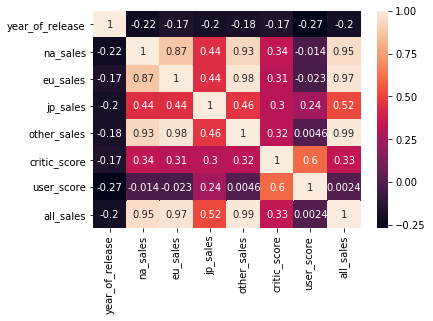

In [97]:
sns.heatmap(df_act[df_act['platform']=='PS3'].corr(), annot=True)

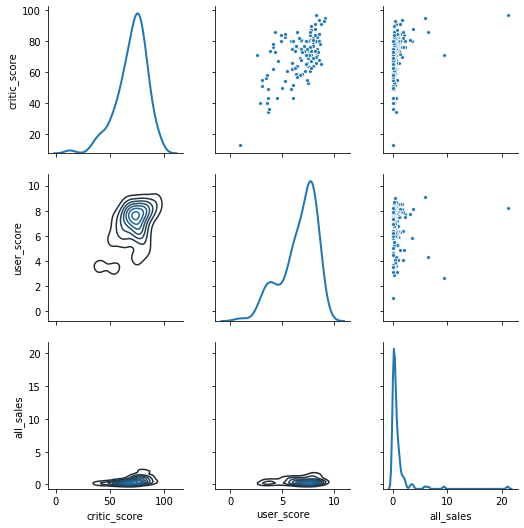

In [98]:
g = sns.PairGrid(df_act[(df_act['platform']=='PS3')
                       & ~(df_act['critic_score'].isna())
                       & ~(df_act['user_score'].isna())
                       & ~(df_act['all_sales'].isna())][['critic_score', 'user_score', 'all_sales']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Оценка пользователей не влияет на продажи по любому из регионов. Оценка критиков имеет большее влияние на продажи, но все же несущественна. Оценки критиков и пользователей имеют среднюю корреляцию между собой. Можно предположить, что пользователи верят оценке критиков и на нее ориентируются. Еще заметно отличие в корреляции продаж Японии. Средний пользователь Японии следит за своими локальными трендами, мировые его меньше интересуют.

Для сравнения построю матрицу плотности и диаграмму корреляции для X360.

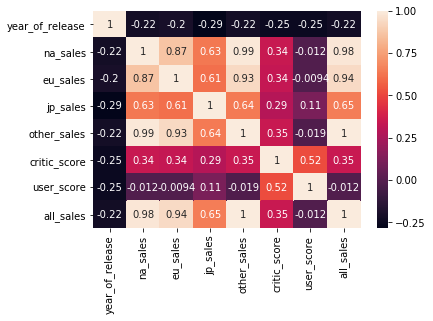

In [99]:
sns.heatmap(df_act[df_act['platform']=='X360'].corr(), annot=True)

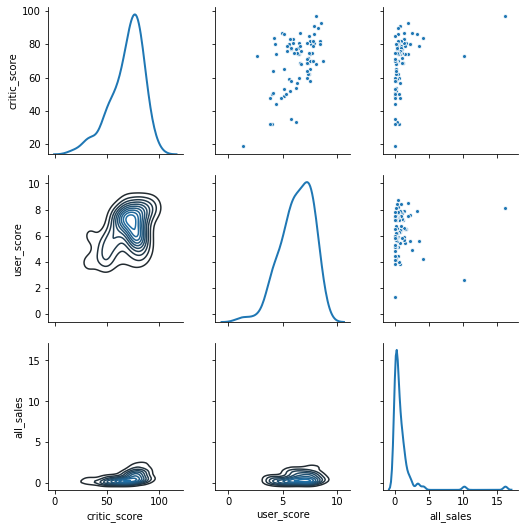

In [100]:
g = sns.PairGrid(df_act[(df_act['platform']=='X360')
                       & ~(df_act['critic_score'].isna())
                       & ~(df_act['user_score'].isna())
                       & ~(df_act['all_sales'].isna())][['critic_score', 'user_score', 'all_sales']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

В общем и целом виды распределений и корреляций между платформами мало чем отличаются.

Сравним прибыльность жанров.

Text(0, 0.5, 'Капитализация')

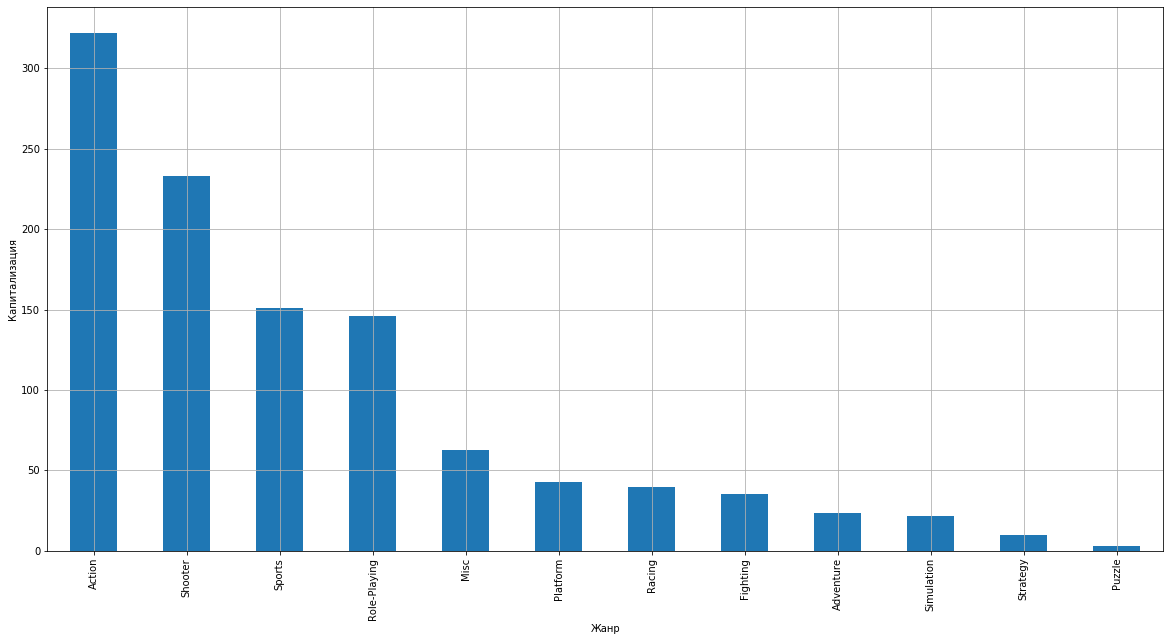

In [101]:
df_act.groupby('genre')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=[20,10], grid=True)
plt.xlabel("Жанр")
plt.ylabel("Капитализация")

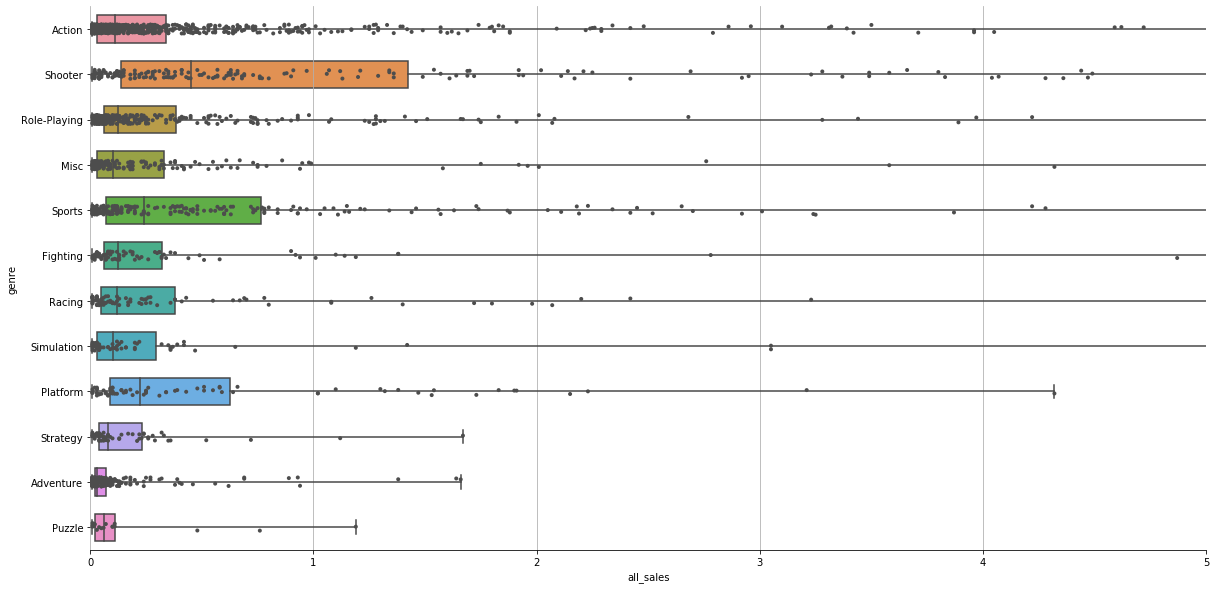

In [102]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="all_sales", y="genre", data=df_act, whis=[0, 100], width=.6)
sns.stripplot(x="all_sales", y="genre", data=df_act,
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(xlim=(0, 5))
sns.despine(trim=True, left=True)

В первой тройке лидеров продаж по жанрам: Action, Sports, Shooter.

Самые не популярные жанры: Adventure, Strategy, Puzzle.

**Вывод**

В ходе исследовательской работы были выявлены интересные факты. В 2008-2009 был пик в индустрии игр. На данный период самыми популярными оказались платформы: PS, DS, Wii, PS3, X360, PS2. Средний срок жизни приставки 7.68 лет. На 2016 г. имеют потенциал: PS4, XOne и 3DS. Чтобы больше заработать разработчик должен ориентироваться на популярные жанры: Action, Sports, Shooter.

## Составление портрета пользователя каждого региона

### Самые популярные платформы в каждом регионе

Рассмотрим топ 5 платформ каждого региона.

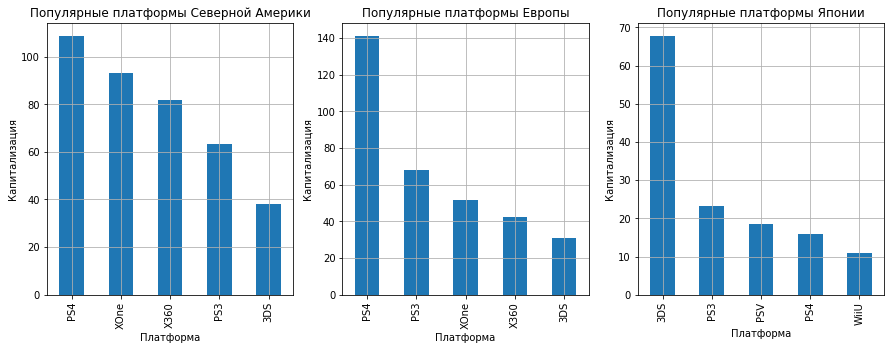

In [103]:
plt.subplot(1, 3, 1)
df_act.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[7,5],
                                                                            grid=True,
                                                                            title='Популярные платформы Северной Америки')
plt.xlabel("Платформа")
plt.ylabel("Капитализация")
plt.subplot(1, 3, 2)
df_act.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[7,5],
                                                                            grid=True,
                                                                            title='Популярные платформы Европы')
plt.xlabel("Платформа")
plt.ylabel("Капитализация")
plt.subplot(1, 3, 3)
df_act.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[15,5],
                                                                            grid=True,
                                                                            title='Популярные платформы Японии')
plt.xlabel("Платформа")
plt.ylabel("Капитализация")
plt.show()

**Вывод**

Как и следовало ожидать, в каждом регионе популярны те платформы, которые в нем производятся.

### Самые популярные жанры в каждом регионе

Рассмотрим топ 5 жанров каждого региона.

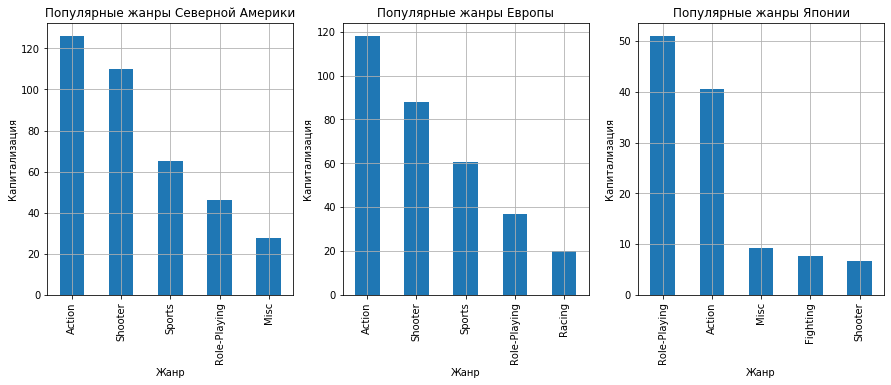

In [104]:
plt.subplot(1, 3, 1)
df_act.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[7,5],
                                                                            grid=True,
                                                                            title='Популярные жанры Северной Америки')
plt.xlabel("Жанр")
plt.ylabel("Капитализация")
plt.subplot(1, 3, 2)
df_act.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[7,5],
                                                                            grid=True,
                                                                            title='Популярные жанры Европы')
plt.xlabel("Жанр")
plt.ylabel("Капитализация")
plt.subplot(1, 3, 3)
df_act.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[15,5],
                                                                            grid=True,
                                                                            title='Популярные жанры Японии')
plt.xlabel("Жанр")
plt.ylabel("Капитализация")
plt.show()

**Вывод**

Если предпочтения жанра среднего пользователя Европы и Северной Америки примерно одинаковы, то в Японии явно выделяется жанр RPG.

### Оценка вляния рейтинга в каждом регионе

Рейтинги ESRB:

* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

Рассмотрим предпочтительные рейтинги игр в каждом регионе.

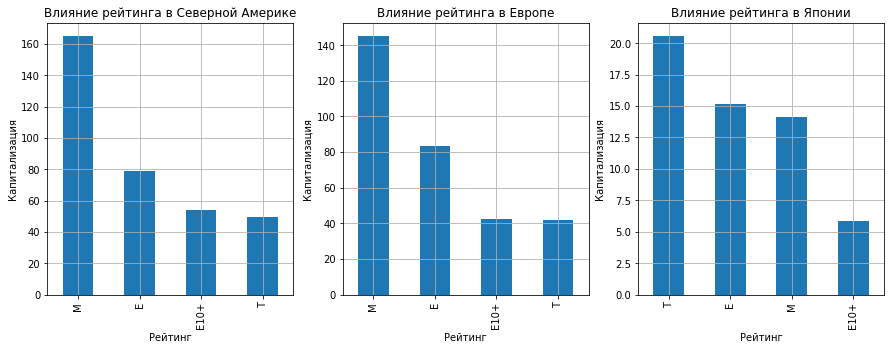

In [105]:
plt.subplot(1, 3, 1)
df_act.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[7,5],
                                                                            grid=True,
                                                                            title='Влияние рейтинга в Северной Америке')
plt.xlabel("Рейтинг")
plt.ylabel("Капитализация")
plt.subplot(1, 3, 2)
df_act.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[7,5],
                                                                            grid=True,
                                                                            title='Влияние рейтинга в Европе')
plt.xlabel("Рейтинг")
plt.ylabel("Капитализация")
plt.subplot(1, 3, 3)
df_act.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                                            figsize=[15,5],
                                                                            grid=True,
                                                                            title='Влияние рейтинга в Японии')
plt.xlabel("Рейтинг")
plt.ylabel("Капитализация")
plt.show()

**Вывод**

Судя по графикам в Японии рейтинг влияет на продажи игр. Скорее всего детям не продают игры с рейтингом «M» («Mature»). В Европе и Северной Америке отличий нет.

## Общий вывод

Данные, которые были предоставлены имели пропуски. В основном они связаны с отсутствием оценки пользователей и критиков малоизветных игр.

В 2008-2009 был пик индустрии игр. После капитализация пошла на спад. Возможно это связано с появлением мощных смартфонов, которыми стали чаще пользоваться в сфере развлечений. Средний срок жизни приставки оказался 7.68 лет. Были выявлены платформы с возможным потенциалом: PS4, XOne и 3DS. А также предпочтительные жанры для заработка: Action, Sports, Shooter. 

Средний пользователь Японии сильно отличается предпочтениями в жанре, в игровой консоли и в рейтинге ESRB от представителей Северной Америки и Европы. Возможно это связано с отличающимся менталитетом восточных стран, либо законодательством. Средний пользователь Японии следит за своими локальными трендами, мировые его меньше интересуют.